This work book is used to show the compare the computation times using various interpolation factors with the PRISM algorithm. 

In [1]:
%config InlineBackend.rc = {"figure.dpi": 72, "figure.figsize": (6.0, 4.0)}
%matplotlib inline

import abtem
import ase
import matplotlib.pyplot as plt
import numpy as np
from ase.io import read
from ase.visualize import view

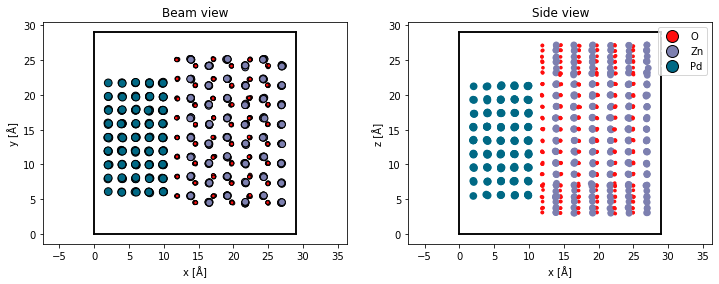

In [2]:
atoms = read(r"C:\Users\Joshu\Desktop\Models\Clusters for simulation\ZnO_186_slab_pd.cfg")

frozen_phonons = abtem.FrozenPhonons(atoms, num_configs=10, sigmas=0.1, seed=100)

atoms_configuration = next(iter(frozen_phonons))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
abtem.show_atoms(atoms_configuration, scale=0.4, ax=ax1, title="Beam view")
abtem.show_atoms(
    atoms_configuration,
    scale=0.4,
    plane="xz",
    legend=True,
    ax=ax2,
    title="Side view",
    linewidth=0.0,
);

In [3]:
view(atoms)

<Popen: returncode: None args: ['C:\\Users\\Joshu\\anaconda3\\envs\\myenv\\p...>

[########################################] | 100% Completed | 3.20 ss


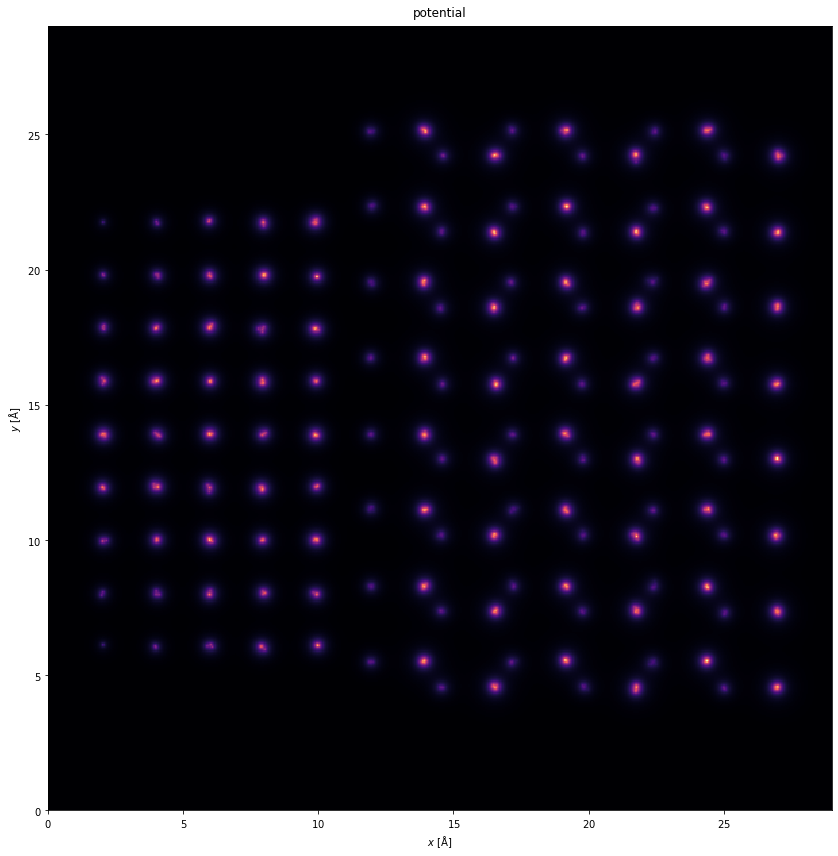

In [4]:
potential = abtem.Potential(
    frozen_phonons,
    sampling=0.05,
    #device="gpu",
    parametrization="lobato",
    projection="infinite"
)


fig, (ax1) = plt.subplots(1,figsize=(20, 12))

potential.show(ax=ax1, cmap='magma', title="potential")
fig.tight_layout()


In [22]:
s_matrix_10 = abtem.SMatrix(
    potential=potential,
    energy=200e3,
    semiangle_cutoff=30,
    interpolation=(10, 5),
)

s_matrix_8 = abtem.SMatrix(
    potential=potential,
    energy=200e3,
    semiangle_cutoff=30,
    interpolation=(8, 4),
)

s_matrix_6 = abtem.SMatrix(
    potential=potential,
    energy=200e3,
    semiangle_cutoff=30,
    interpolation=(6, 3),
)

s_matrix_4 = abtem.SMatrix(
    potential=potential,
    energy=200e3,
    semiangle_cutoff=30,
    interpolation=(4, 2),
)

s_matrix_3 = abtem.SMatrix(
    potential=potential,
    energy=200e3,
    semiangle_cutoff=30,
    interpolation=(3, 2),
)

s_matrix_2 = abtem.SMatrix(
    potential=potential,
    energy=200e3,
    semiangle_cutoff=30,
    interpolation=(2, 1),
)

#s_matrix_1 = abtem.SMatrix(
 #   potential=potential,
  #  energy=200e3,
   # semiangle_cutoff=30,
    #interpolation=(1, 1),
#)

#s_matrix = abtem.SMatrix(
 #   potential=potential,
  #  energy=200e3,
   # semiangle_cutoff=30,
    
#)

C:\Users\Joshu\anaconda3\envs\myenv\lib\site-packages\abtem\prism\s_matrix.py:1416: UserWarning: The interpolation factor does not exactly divide 'gpts', normalization may not be exactly preserved.
  warnings.warn(


In [23]:
exit_waves_line = s_matrix_10.multislice(potential=potential)

In [24]:
sampling = abtem.transfer.nyquist_sampling(s_matrix_1.semiangle_cutoff, s_matrix_1.energy)

scan = abtem.GridScan(
    start=(0, 0),
    end=(1, 1),
    fractional=True,
    potential=potential,
    sampling=sampling,
)

print(f"Number of probe positions: {len(scan)}")
print(f"Number of plane waves: {len(s_matrix_1)}")
print(f"Ratio: {len(scan) / len(s_matrix_1):.1f}")

Number of probe positions: 19321
Number of plane waves: 3893
Ratio: 5.0


In [25]:
detector = abtem.AnnularDetector(inner=60, outer=150)

In [26]:
measurement_10 = s_matrix_10.scan(
    scan=scan,
    detectors=detector,
).compute()



[########################################] | 100% Completed | 86.18 s


In [27]:
measurement_8 = s_matrix_8.scan(
    scan=scan,
    detectors=detector,
).compute()



[                                        ] | 1% Completed | 138.37 ms

C:\Users\Joshu\anaconda3\envs\myenv\lib\site-packages\abtem\prism\s_matrix.py:1416: UserWarning: The interpolation factor does not exactly divide 'gpts', normalization may not be exactly preserved.
  warnings.warn(


[########################################] | 100% Completed | 118.79 s


In [28]:
measurement_6 = s_matrix_6.scan(
    scan=scan,
    detectors=detector,
).compute()



[                                        ] | 1% Completed | 131.35 ms

C:\Users\Joshu\anaconda3\envs\myenv\lib\site-packages\abtem\prism\s_matrix.py:1416: UserWarning: The interpolation factor does not exactly divide 'gpts', normalization may not be exactly preserved.
  warnings.warn(


[########################################] | 100% Completed | 216.08 s


In [29]:
measurement_4 = s_matrix_4.scan(
    scan=scan,
    detectors=detector,
).compute()



[########################################] | 100% Completed | 442.28 s


In [30]:
measurement_3 = s_matrix_3.scan(
    scan=scan,
    detectors=detector,
).compute()


[                                        ] | 2% Completed | 144.85 ms

C:\Users\Joshu\anaconda3\envs\myenv\lib\site-packages\abtem\prism\s_matrix.py:1416: UserWarning: The interpolation factor does not exactly divide 'gpts', normalization may not be exactly preserved.
  warnings.warn(


[########################################] | 100% Completed | 583.99 s


In [31]:
measurement_2 = s_matrix_2.scan(
    scan=scan,
    detectors=detector,
).compute()



[########################################] | 100% Completed | 41m 20s


In [10]:
measurement_1 = s_matrix_1.scan(
    scan=scan,
    detectors=detector,
).compute()



[########################################] | 100% Completed | 77m 59s


In [11]:
measurement = s_matrix.scan(
    scan=scan,
    detectors=detector,
).compute()

[########################################] | 100% Completed | 79m 43s


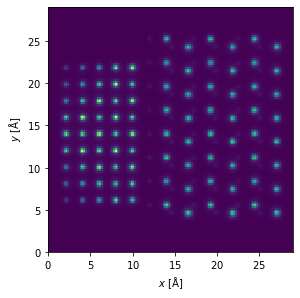

In [37]:
measurement_1.show()

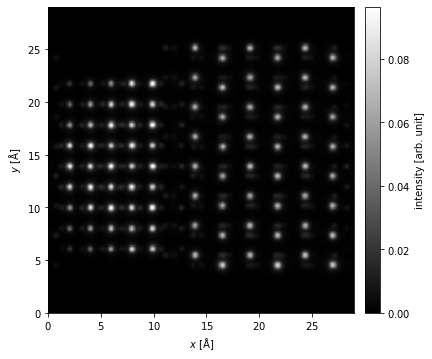

In [54]:
interpolated_measurement = measurement_10.interpolate(0.05)
interpolated_measurement.show(explode=True, cbar=True, figsize=(10, 5), cmap='gray');

plt.savefig('interpolation_10.png')

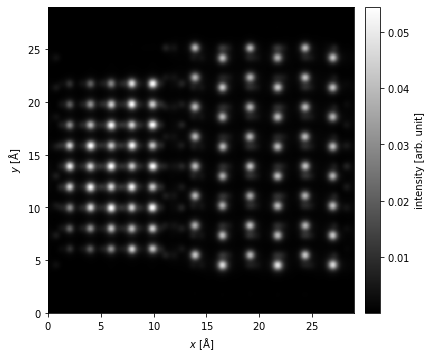

In [55]:
filtered_measurements = interpolated_measurement.gaussian_filter(0.2)

filtered_measurements.show(explode=True, cbar=True, figsize=(10, 5), cmap='gray');

plt.savefig('interpolation_10_blur.png')